<a href="https://colab.research.google.com/github/MohammedSaudh/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [68]:
working_dir = '/content/drive/MyDrive/Colab Notebooks/Almabetter/Play Store App Review Analysis - Mohammed Saudh/Data/'

In [69]:
user_reviews = pd.read_csv(working_dir + 'User Reviews.csv')
play_store_data = pd.read_csv(working_dir + 'Play Store Data.csv')

In [70]:
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [71]:
play_store_data.shape

(10841, 13)

In [72]:
play_store_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [73]:
play_store_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
user_reviews.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


In [74]:
user_reviews.shape

(64295, 5)

In [75]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [12]:
mean_rating_by_category = play_store_data.groupby('Category')['Rating'].mean()

In [76]:
mean_rating_by_category

Category
1.9                    19.000000
ART_AND_DESIGN          4.358065
AUTO_AND_VEHICLES       4.190411
BEAUTY                  4.278571
BOOKS_AND_REFERENCE     4.346067
BUSINESS                4.121452
COMICS                  4.155172
COMMUNICATION           4.158537
DATING                  3.970769
EDUCATION               4.389032
ENTERTAINMENT           4.126174
EVENTS                  4.435556
FAMILY                  4.192272
FINANCE                 4.131889
FOOD_AND_DRINK          4.166972
GAME                    4.286326
HEALTH_AND_FITNESS      4.277104
HOUSE_AND_HOME          4.197368
LIBRARIES_AND_DEMO      4.178462
LIFESTYLE               4.094904
MAPS_AND_NAVIGATION     4.051613
MEDICAL                 4.189143
NEWS_AND_MAGAZINES      4.132189
PARENTING               4.300000
PERSONALIZATION         4.335987
PHOTOGRAPHY             4.192114
PRODUCTIVITY            4.211396
SHOPPING                4.259664
SOCIAL                  4.255598
SPORTS                  4.223511
T

In [77]:
play_store_data[play_store_data['Category']== '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [78]:
play_store_data.drop(play_store_data.index[10472],inplace=True)

Text(0.5, 1.0, 'Average Ratings By Category')

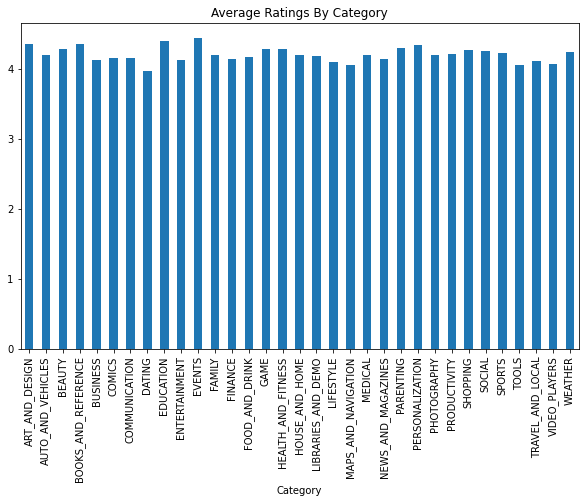

In [79]:
plt.rcParams['figure.figsize'] = (10, 6)
play_store_data.groupby('Category')['Rating'].mean().plot(kind='bar');
plt.title('Average Ratings By Category')

In [80]:
def printinfo():
  temp = pd.DataFrame(index=play_store_data.columns)
  temp['Data Type'] = play_store_data.dtypes
  temp['null_count'] = play_store_data.isnull().sum()
  temp['Unique Count'] = play_store_data.nunique()
  return temp

In [81]:
printinfo()

,Data Type,null_count,Unique Count
App,object,0,9659
Category,object,0,33
Rating,float64,1474,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,1,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [82]:
play_store_data[play_store_data['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [83]:
play_store_data['Type'].fillna("Free", inplace=True)

In [84]:
printinfo()

,Data Type,null_count,Unique Count
App,object,0,9659
Category,object,0,33
Rating,float64,1474,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [85]:
play_store_data.drop(['Current Ver', 'Last Updated', 'Android Ver'], axis=1, inplace=True)

In [86]:
printinfo()

,Data Type,null_count,Unique Count
App,object,0,9659
Category,object,0,33
Rating,float64,1474,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [87]:
play_store_data[play_store_data['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty
...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business


In [88]:
Rating_mode = play_store_data['Rating'].mode()

In [89]:
Rating_mode[0]

4.4

In [90]:
play_store_data['Rating'].fillna(value = Rating_mode[0], inplace=True)

In [91]:
printinfo()

,Data Type,null_count,Unique Count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [92]:
play_store_data['Reviews'] = play_store_data.Reviews.astype(int)

In [93]:
printinfo()

,Data Type,null_count,Unique Count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [94]:
list(play_store_data['Size'].unique())

['19M',
 '14M',
 '8.7M',
 '25M',
 '2.8M',
 '5.6M',
 '29M',
 '33M',
 '3.1M',
 '28M',
 '12M',
 '20M',
 '21M',
 '37M',
 '2.7M',
 '5.5M',
 '17M',
 '39M',
 '31M',
 '4.2M',
 '7.0M',
 '23M',
 '6.0M',
 '6.1M',
 '4.6M',
 '9.2M',
 '5.2M',
 '11M',
 '24M',
 'Varies with device',
 '9.4M',
 '15M',
 '10M',
 '1.2M',
 '26M',
 '8.0M',
 '7.9M',
 '56M',
 '57M',
 '35M',
 '54M',
 '201k',
 '3.6M',
 '5.7M',
 '8.6M',
 '2.4M',
 '27M',
 '2.5M',
 '16M',
 '3.4M',
 '8.9M',
 '3.9M',
 '2.9M',
 '38M',
 '32M',
 '5.4M',
 '18M',
 '1.1M',
 '2.2M',
 '4.5M',
 '9.8M',
 '52M',
 '9.0M',
 '6.7M',
 '30M',
 '2.6M',
 '7.1M',
 '3.7M',
 '22M',
 '7.4M',
 '6.4M',
 '3.2M',
 '8.2M',
 '9.9M',
 '4.9M',
 '9.5M',
 '5.0M',
 '5.9M',
 '13M',
 '73M',
 '6.8M',
 '3.5M',
 '4.0M',
 '2.3M',
 '7.2M',
 '2.1M',
 '42M',
 '7.3M',
 '9.1M',
 '55M',
 '23k',
 '6.5M',
 '1.5M',
 '7.5M',
 '51M',
 '41M',
 '48M',
 '8.5M',
 '46M',
 '8.3M',
 '4.3M',
 '4.7M',
 '3.3M',
 '40M',
 '7.8M',
 '8.8M',
 '6.6M',
 '5.1M',
 '61M',
 '66M',
 '79k',
 '8.4M',
 '118k',
 '44M',
 '695

In [95]:
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: x.strip('+'))

In [96]:
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: x.replace(',', ''))

In [97]:
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: x.replace('M', 'e+6'))
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: x.replace('k', 'e+3'))

In [98]:
play_store_data['Size'] = play_store_data.Size.replace('Varies with device', np.NaN)

In [99]:
play_store_data['Size'] = pd.to_numeric(play_store_data['Size'])

In [100]:
printinfo()

,Data Type,null_count,Unique Count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,float64,1695,459
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [101]:
play_store_data.dropna(subset=['Size'], inplace=True)

In [102]:
printinfo()

,Data Type,null_count,Unique Count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,object,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


In [103]:
play_store_data['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10835            10+
10836         5,000+
10837           100+
10838         1,000+
10840    10,000,000+
Name: Installs, Length: 9145, dtype: object

In [104]:
play_store_data['Installs'] = play_store_data.Installs.apply(lambda x: x.strip('+'))

In [105]:
play_store_data['Installs'] = play_store_data.Installs.apply(lambda x: x.replace(',',''))

In [106]:
play_store_data['Installs'] = pd.to_numeric(play_store_data['Installs'])

In [107]:
printinfo()

,Data Type,null_count,Unique Count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


In [108]:
play_store_data['Price'] = play_store_data.Price.apply(lambda x: x.strip('$'))

In [109]:
play_store_data['Price'] = pd.to_numeric(play_store_data['Price'])

In [110]:
printinfo()

,Data Type,null_count,Unique Count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


In [111]:
play_store_data.describe()

,Rating,Reviews,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9.145000e+03,9145.000000
mean,4.208868,2.490487e+05,2.151653e+07,7.114842e+06,1.184366
std,0.507267,1.716211e+06,2.258875e+07,4.619357e+07,17.355754
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,4.900000e+06,1.000000e+03,0.000000
50%,4.400000,7.420000e+02,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,3.000000e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000


In [112]:
category_wise_count = play_store_data['Category'].value_counts().reset_index().rename(columns={'index':'Category','Category':'Count'})

In [113]:
category_wise_count

,Category,Count
0,FAMILY,1832
1,GAME,1015
2,TOOLS,739
3,MEDICAL,434
4,BUSINESS,400
5,PERSONALIZATION,355
6,LIFESTYLE,345
7,SPORTS,311
8,FINANCE,307
9,PRODUCTIVITY,303


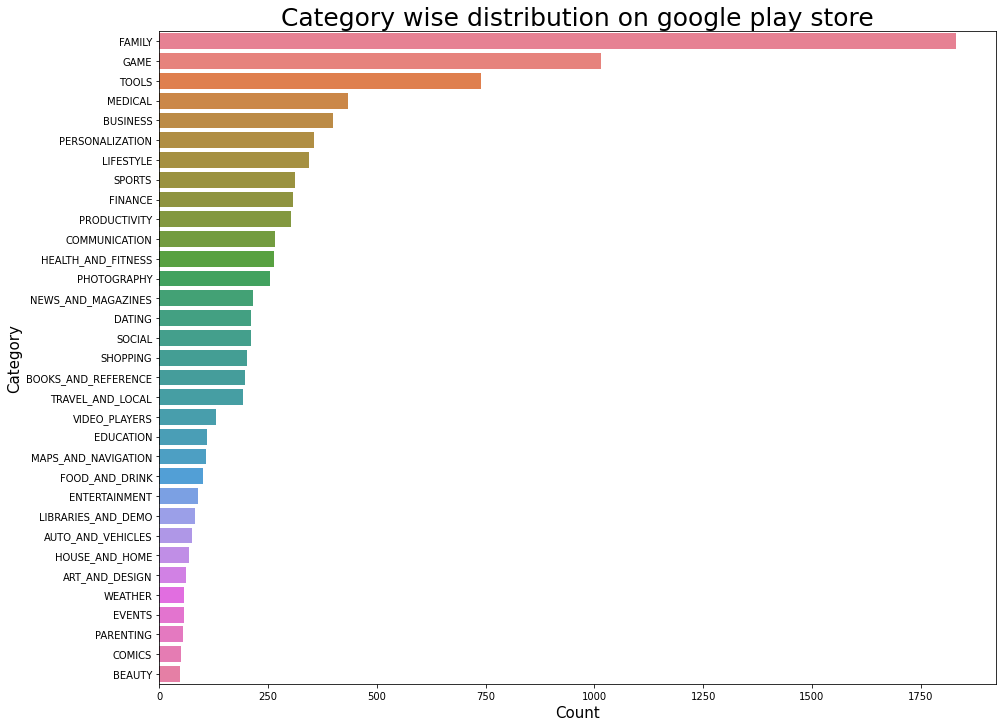

In [114]:
plt.figure(figsize = (15,12))
plt.xlabel('Count', fontsize=15)
plt.ylabel('Category', fontsize=15)
graph = sns.barplot(x='Count', y ='Category' , data=category_wise_count, palette='husl')
graph.set_title("Category wise distribution on google play store", fontsize = 25);

In [115]:
content_rating_wise_distribution = play_store_data['Content Rating'].value_counts().reset_index().rename(columns={'index':'Content Rating', 'Content Rating':'No.Of Apps'})

In [116]:
content_rating_wise_distribution

,Content Rating,No.Of Apps
0,Everyone,7416
1,Teen,987
2,Mature 17+,406
3,Everyone 10+,332
4,Adults only 18+,2
5,Unrated,2


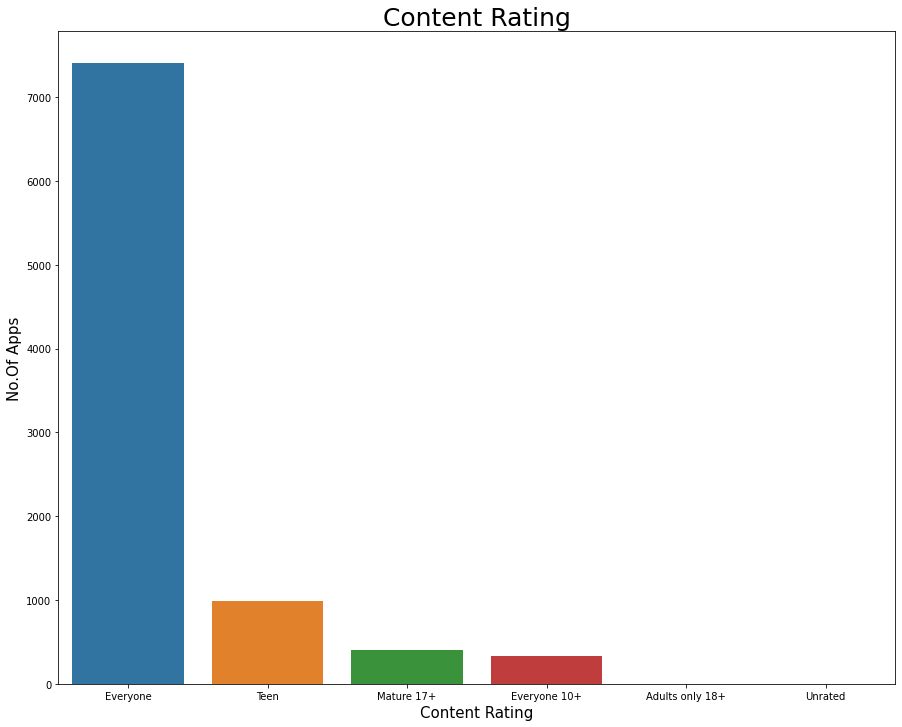

In [117]:
plt.figure(figsize = (15,12))
plt.ylabel('No.Of Apps', fontsize=15)
plt.xlabel('Content Rating', fontsize=15)
plt.title('Content Rating', size=25)
sns.barplot(x='Content Rating', y='No.Of Apps', data=content_rating_wise_distribution);

In [128]:
category_wise_installs = play_store_data.groupby('Category')['Installs'].sum().reset_index().sort_values(by='Installs', ascending=False)

In [129]:
category_wise_installs

,Category,Installs
14,GAME,29874564253
11,FAMILY,6798793425
6,COMMUNICATION,4941943051
21,NEWS_AND_MAGAZINES,4252005650
29,TOOLS,3527094815
25,PRODUCTIVITY,2742312744
24,PHOTOGRAPHY,2557897655
26,SHOPPING,1504248785
28,SPORTS,1138949498
23,PERSONALIZATION,998179772


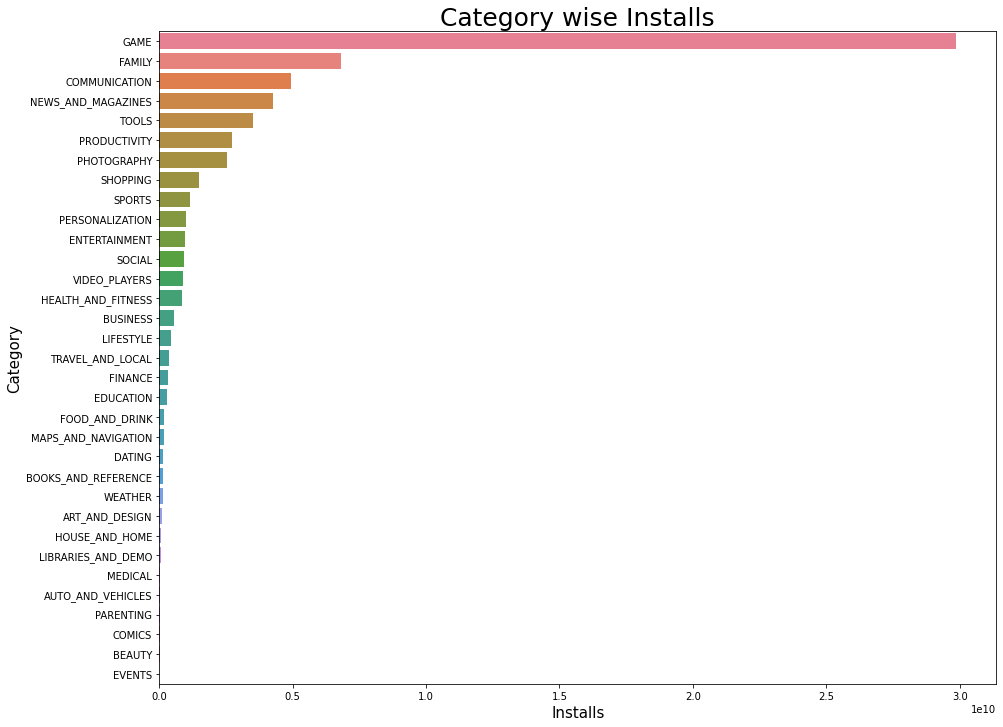

In [131]:
plt.figure(figsize = (15,12))
plt.ylabel('Category', fontsize=15)
plt.xlabel('Installs', fontsize=15)
plt.title('Category wise Installs', size=25)
sns.barplot(x='Installs', y ='Category' , data=category_wise_installs, palette='husl');

In [134]:
content_rating_wise_installs = play_store_data.groupby('Content Rating')['Installs'].sum().reset_index().sort_values(by='Installs', ascending=False)

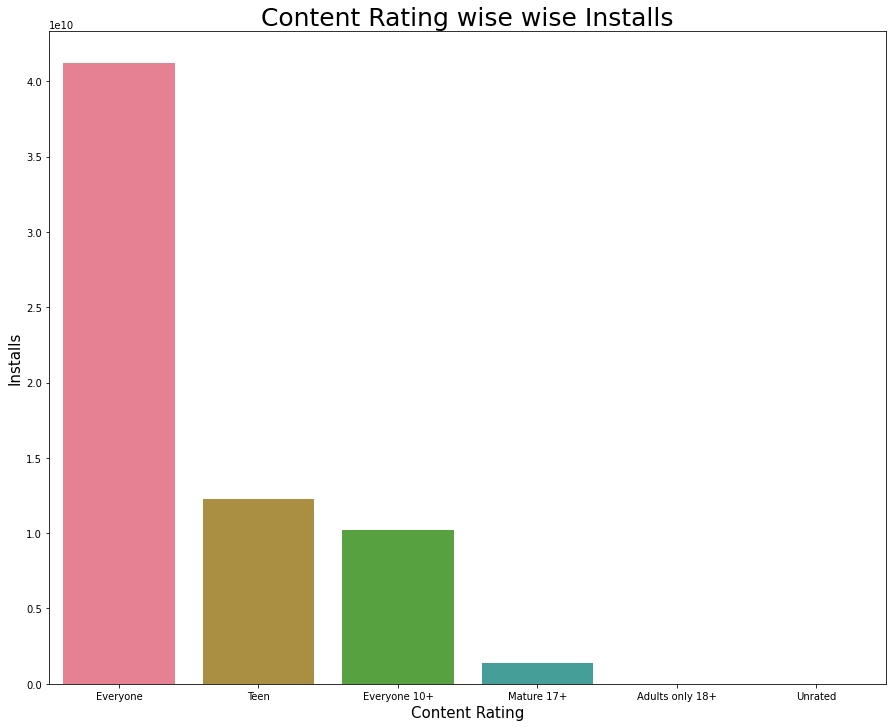

In [137]:
plt.figure(figsize = (15,12))
plt.ylabel('Installs', fontsize=15)
plt.xlabel('Content Rating', fontsize=15)
plt.title('Content Rating wise wise Installs', size=25)
sns.barplot(x='Content Rating', y ='Installs' , data=content_rating_wise_installs, palette='husl');

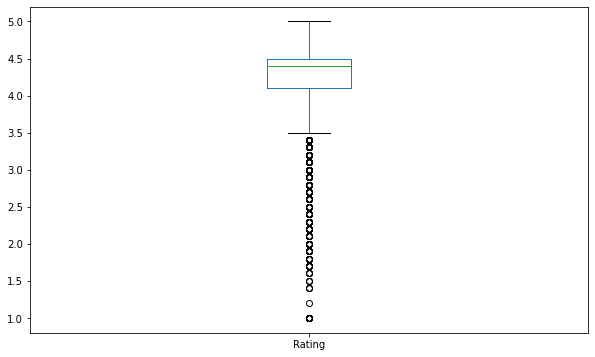

In [141]:
play_store_data['Rating'].plot(kind='box')

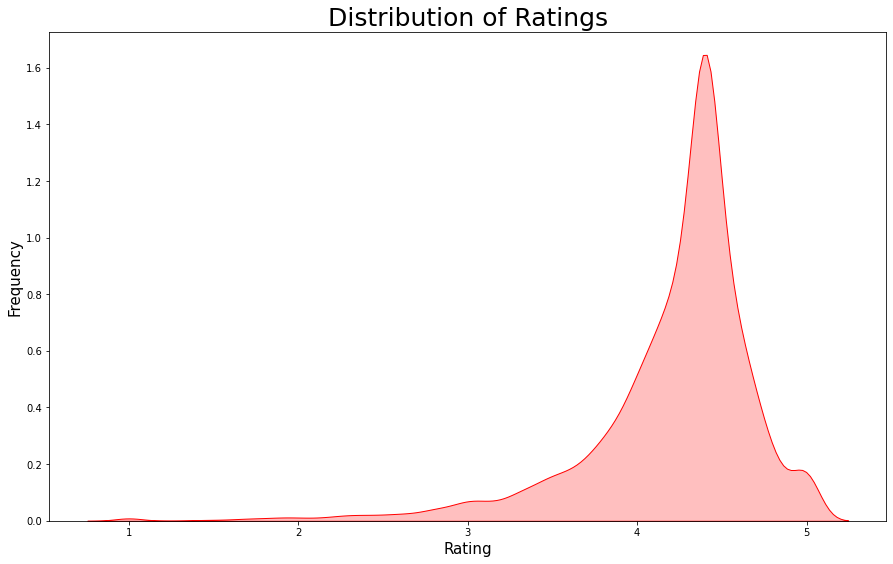

In [144]:
plt.figure(figsize=(15,9))
plt.xlabel('Rating', size=15)
plt.ylabel('Frequency', size=15)
graph= sns.kdeplot(play_store_data.Rating, color='Red', shade=True)
plt.title('Distribution of Ratings', size = 25);